In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sns
from scipy.stats import pearsonr

import plotly.graph_objects as go
from sklearn.datasets import make_moons



In [86]:
df = pd.read_csv('cleanData1.csv')


In [87]:
df[0:10]

,PIDMTERM,TERM,1st_College_Semester_GPA,HighSchool,SARADAP_PIDM,GENDER,AGE,MILES_FROM_TTU,APPDT,Hours_Transferred_In,...,TN_Geographic_Divisions,MAJOR,COLLEGE,CLASS,SEGMENT,COLLEGES1,MAJORS1,Spring_1_Retention,College_Change,Major_Change
0,1.636620e+11,201980,2.00,Cookeville High School,163662,F,28,0.98,43641,0.0,...,Middle,GHS,IP,FR,2019,IP,GHS,0,0,0
1,1.871450e+11,201980,2.67,Cherokee High School,187145,M,26,0.98,43494,0.0,...,Middle,CSC,EN,FR,2019,EN,CSC,0,0,0
2,2.022230e+11,201980,2.45,White County High School,202223,M,21,15.60,43343,0.0,...,Middle,CSC,EN,FR,2019,EN,CSC,1,0,0
3,2.155820e+11,201980,2.60,Anderson County High School,215582,M,22,79.95,43386,9.0,...,East,BIOL,AS,FR,2019,AS,BIOL,1,0,0
4,2.216790e+11,201980,1.50,Cookeville High School,221679,M,25,2.23,43392,0.0,...,Middle,BMGT,BA,FR,2019,BA,MKT,1,0,1
5,2.335520e+11,201980,0.00,Livingston Academy,233552,M,24,26.79,43430,0.0,...,Middle,ENG,AS,FR,2019,AS,ENG,0,0,0
6,2.355300e+11,201980,4.00,Moore County High School,235530,F,21,77.77,43320,7.0,...,Middle,CE,EN,FR,2019,EN,CE,1,0,0
7,2.419430e+11,201980,2.93,Cumberland County High School,241943,M,21,31.77,43382,0.0,...,East,CSC,EN,FR,2019,EN,CSC,1,0,0
8,2.421310e+11,201980,3.46,Gateway Christian Schools,242131,F,22,119.28,43350,6.0,...,Middle,PSY,ED,FR,2019,AH,HEC,1,1,1
9,2.421350e+11,201980,4.00,Henry County High School,242135,M,21,156.70,43314,8.0,...,West,CMPE,EN,SO,2019,EN,CMPE,1,0,0


In [88]:
pd.crosstab(df['Spring_1_Retention'], "Spring_1_Retention")

col_0,Spring_1_Retention
Spring_1_Retention,
0,715
1,6377


In [89]:
df.describe()

,PIDMTERM,TERM,1st_College_Semester_GPA,SARADAP_PIDM,AGE,MILES_FROM_TTU,Hours_Transferred_In,HS_GRAD_YEAR,HIGH_SCHOOL_GPA,ORIENTATION_SESSION,ACT_COMPOSITE,Pell_Eligible,First_Gen_Status,Appalachian_County,SEGMENT,Spring_1_Retention,College_Change,Major_Change
count,7.092000e+03,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000
mean,3.230413e+11,202137.289904,2.853953,323041.342217,20.103497,78.138405,8.795639,2014.778765,3.796786,6.496898,23.830231,0.378737,0.263818,0.570502,2020.572899,0.899182,0.089679,0.134236
std,2.743491e+10,113.850513,1.102644,27434.915638,1.386725,126.680459,39.179452,107.160646,6.773257,4.575152,5.088521,0.485107,0.440733,0.495039,1.138505,0.301109,0.285741,0.340929
min,9.840520e+10,201980.000000,0.000000,98405.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,0.000000,0.000000,0.000000
25%,3.009492e+11,202080.000000,2.420000,300949.250000,19.000000,28.770000,0.000000,2019.000000,3.440000,3.000000,21.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,0.000000,0.000000
50%,3.258655e+11,202180.000000,3.190000,325865.500000,20.000000,61.365000,0.000000,2021.000000,3.820000,6.000000,24.000000,0.000000,0.000000,1.000000,2021.000000,1.000000,0.000000,0.000000
75%,3.476722e+11,202280.000000,3.710000,347672.250000,21.000000,81.620000,10.000000,2022.000000,4.000000,9.000000,27.000000,1.000000,1.000000,1.000000,2022.000000,1.000000,0.000000,0.000000
max,3.731140e+11,202280.000000,4.000000,373114.000000,42.000000,3230.900000,1753.500000,2023.000000,518.000000,25.000000,36.000000,1.000000,1.000000,1.000000,2022.000000,1.000000,1.000000,1.000000


In [90]:
df.isnull().sum()

PIDMTERM                    0
TERM                        0
1st_College_Semester_GPA    0
HighSchool                  0
SARADAP_PIDM                0
GENDER                      0
AGE                         0
MILES_FROM_TTU              0
APPDT                       0
Hours_Transferred_In        0
HS_GRAD_YEAR                0
HIGH_SCHOOL_GPA             0
COLLEGE_CODE_DESC           0
MAJOR_DESC                  0
HOUSING                     0
ORIENTATION_SESSION         0
ORIENTATION_COMPLETED       0
ACT_COMPOSITE               0
Ethnicity                   0
INOUTST_Desc                0
LOAD_Desc                   0
Program_Name                0
Pell_Eligible               0
First_Gen_Status            0
Appalachian_County          0
TN_Geographic_Divisions     0
MAJOR                       0
COLLEGE                     0
CLASS                       0
SEGMENT                     0
COLLEGES1                   0
MAJORS1                     0
Spring_1_Retention          0
College_Ch

(array([ 460.,  159.,  158.,  213.,  253.,  510.,  828.,  973., 1474.,
        2064.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

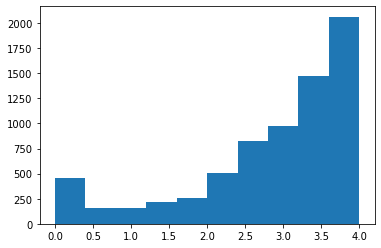

In [91]:
plt.hist(df['1st_College_Semester_GPA'])

(array([ 273., 2186., 1005.,  681.,    0.,  930.,  634.,  408.,  716.,
         259.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

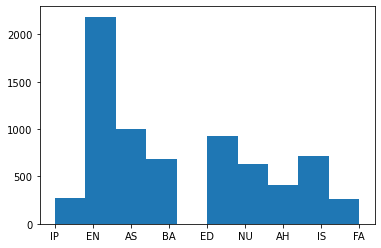

In [92]:
plt.hist(df['COLLEGE'])

(array([1460., 2056.,  911.,  385.,  733.,  205.,  226.,  305.,   63.,
         748.]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <BarContainer object of 10 artists>)

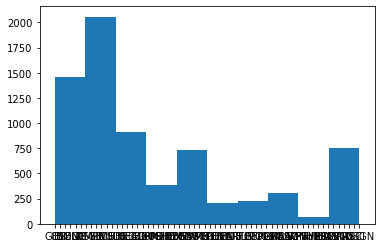

In [93]:
plt.hist(df['MAJOR'])

In [94]:
#plt.bar(df['MAJOR'], df['Spring_1_Retention'])
#plt.title("Bar Chart")
  
#plt.xlabel('MAJOR')
#plt.ylabel('Spring_1_Retention')

#plt.show()

In [95]:
# Scatter plot
#plt.scatter(tips['total_bill'], tips['tip'])
  
# Adding Title to the Plot
#plt.title("Scatter Plot")
  
# Setting the X and Y labels
#plt.xlabel('Total Bill')
#plt.ylabel('Tip')
  
#plt.show()


In [96]:
pd.crosstab(df['GENDER'],df['GENDER'])

GENDER,0,F,M,N
GENDER,,,,
0,11,0,0,0
F,0,3188,0,0
M,0,0,3880,0
N,0,0,0,13


In [97]:
#Dummies for Gender. 
df_laterality = pd.get_dummies(df, prefix='', prefix_sep='', columns=['GENDER'])
print(df_laterality)


          PIDMTERM    TERM  1st_College_Semester_GPA  \
0     1.636620e+11  201980                      2.00   
1     1.871450e+11  201980                      2.67   
2     2.022230e+11  201980                      2.45   
3     2.155820e+11  201980                      2.60   
4     2.216790e+11  201980                      1.50   
...            ...     ...                       ...   
7087  3.657290e+11  202280                      1.29   
7088  3.693660e+11  202280                      0.38   
7089  3.693800e+11  202280                      3.08   
7090  3.701950e+11  202280                      2.50   
7091  3.707270e+11  202280                      2.86   

                         HighSchool  SARADAP_PIDM  AGE  MILES_FROM_TTU  APPDT  \
0            Cookeville High School        163662   28            0.98  43641   
1              Cherokee High School        187145   26            0.98  43494   
2          White County High School        202223   21           15.60  43343   
3  

In [98]:
df_laterality = df_laterality.rename(columns={"M": "male", "F": "female"})


In [99]:
df_laterality = df_laterality.rename(columns={"0": "gender_0","N": "gender_N"})


In [100]:
df_laterality

,PIDMTERM,TERM,1st_College_Semester_GPA,HighSchool,SARADAP_PIDM,AGE,MILES_FROM_TTU,APPDT,Hours_Transferred_In,HS_GRAD_YEAR,...,SEGMENT,COLLEGES1,MAJORS1,Spring_1_Retention,College_Change,Major_Change,gender_0,female,male,gender_N
0,1.636620e+11,201980,2.00,Cookeville High School,163662,28,0.98,43641,0.0,2012,...,2019,IP,GHS,0,0,0,0,1,0,0
1,1.871450e+11,201980,2.67,Cherokee High School,187145,26,0.98,43494,0.0,2014,...,2019,EN,CSC,0,0,0,0,0,1,0
2,2.022230e+11,201980,2.45,White County High School,202223,21,15.60,43343,0.0,2018,...,2019,EN,CSC,1,0,0,0,0,1,0
3,2.155820e+11,201980,2.60,Anderson County High School,215582,22,79.95,43386,9.0,2019,...,2019,AS,BIOL,1,0,0,0,0,1,0
4,2.216790e+11,201980,1.50,Cookeville High School,221679,25,2.23,43392,0.0,2015,...,2019,BA,MKT,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7087,3.657290e+11,202280,1.29,Punjab School Education Board,365729,20,0.00,44617,0.0,2018,...,2022,BA,IBAC,1,0,0,0,0,1,0
7088,3.693660e+11,202280,0.38,St Ursula Eichi High School,369366,20,0.00,44656,0.0,2022,...,2022,AH,AGRI,1,0,0,0,0,1,0
7089,3.693800e+11,202280,3.08,Oakland High School,369380,18,0.00,44656,0.0,2022,...,2022,EN,ET,1,0,0,0,0,1,0
7090,3.701950e+11,202280,2.50,Rene Descartes High School,370195,17,0.00,44676,0.0,0,...,2022,IS,LIST,1,0,0,0,1,0,0


In [101]:
df_college = pd.get_dummies(df_laterality, prefix='college_of_', prefix_sep='', columns=['COLLEGE'])
print(df_college)


          PIDMTERM    TERM  1st_College_Semester_GPA  \
0     1.636620e+11  201980                      2.00   
1     1.871450e+11  201980                      2.67   
2     2.022230e+11  201980                      2.45   
3     2.155820e+11  201980                      2.60   
4     2.216790e+11  201980                      1.50   
...            ...     ...                       ...   
7087  3.657290e+11  202280                      1.29   
7088  3.693660e+11  202280                      0.38   
7089  3.693800e+11  202280                      3.08   
7090  3.701950e+11  202280                      2.50   
7091  3.707270e+11  202280                      2.86   

                         HighSchool  SARADAP_PIDM  AGE  MILES_FROM_TTU  APPDT  \
0            Cookeville High School        163662   28            0.98  43641   
1              Cherokee High School        187145   26            0.98  43494   
2          White County High School        202223   21           15.60  43343   
3  

(array([8.260e+02, 5.112e+03, 1.102e+03, 4.000e+01, 9.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 18.6, 21.2, 23.8, 26.4, 29. , 31.6, 34.2, 36.8, 39.4, 42. ]),
 <BarContainer object of 10 artists>)

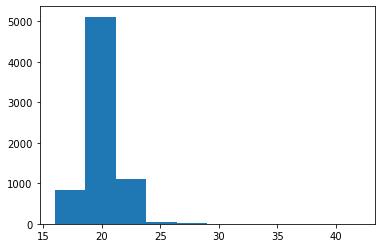

In [102]:
plt.hist(df['AGE'])

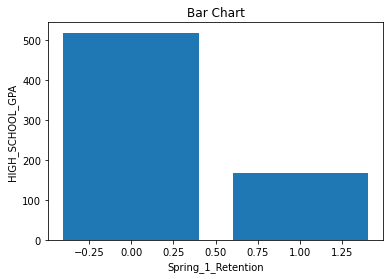

In [103]:
plt.bar(df['Spring_1_Retention'], df['HIGH_SCHOOL_GPA'])
  
plt.title("Bar Chart")
  
plt.xlabel('Spring_1_Retention')
plt.ylabel('HIGH_SCHOOL_GPA')

plt.show()

In [104]:
df.describe()

,PIDMTERM,TERM,1st_College_Semester_GPA,SARADAP_PIDM,AGE,MILES_FROM_TTU,Hours_Transferred_In,HS_GRAD_YEAR,HIGH_SCHOOL_GPA,ORIENTATION_SESSION,ACT_COMPOSITE,Pell_Eligible,First_Gen_Status,Appalachian_County,SEGMENT,Spring_1_Retention,College_Change,Major_Change
count,7.092000e+03,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000
mean,3.230413e+11,202137.289904,2.853953,323041.342217,20.103497,78.138405,8.795639,2014.778765,3.796786,6.496898,23.830231,0.378737,0.263818,0.570502,2020.572899,0.899182,0.089679,0.134236
std,2.743491e+10,113.850513,1.102644,27434.915638,1.386725,126.680459,39.179452,107.160646,6.773257,4.575152,5.088521,0.485107,0.440733,0.495039,1.138505,0.301109,0.285741,0.340929
min,9.840520e+10,201980.000000,0.000000,98405.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,0.000000,0.000000,0.000000
25%,3.009492e+11,202080.000000,2.420000,300949.250000,19.000000,28.770000,0.000000,2019.000000,3.440000,3.000000,21.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,0.000000,0.000000
50%,3.258655e+11,202180.000000,3.190000,325865.500000,20.000000,61.365000,0.000000,2021.000000,3.820000,6.000000,24.000000,0.000000,0.000000,1.000000,2021.000000,1.000000,0.000000,0.000000
75%,3.476722e+11,202280.000000,3.710000,347672.250000,21.000000,81.620000,10.000000,2022.000000,4.000000,9.000000,27.000000,1.000000,1.000000,1.000000,2022.000000,1.000000,0.000000,0.000000
max,3.731140e+11,202280.000000,4.000000,373114.000000,42.000000,3230.900000,1753.500000,2023.000000,518.000000,25.000000,36.000000,1.000000,1.000000,1.000000,2022.000000,1.000000,1.000000,1.000000


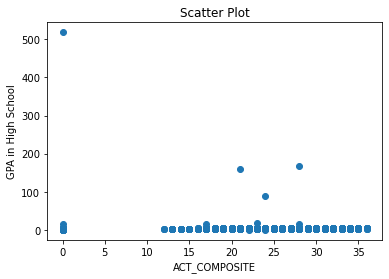

In [105]:
plt.scatter(df['ACT_COMPOSITE'], df['HIGH_SCHOOL_GPA'])
plt.title("Scatter Plot")
plt.xlabel('ACT_COMPOSITE')
plt.ylabel('GPA in High School')
plt.show()


(array([  69.,    0.,    0.,   43.,  437., 1663., 2398., 1202.,  997.,
         283.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <BarContainer object of 10 artists>)

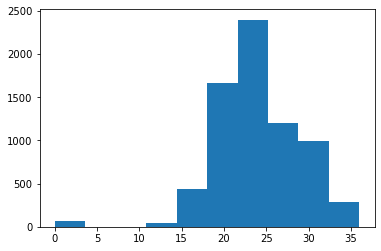

In [106]:
plt.hist(df['ACT_COMPOSITE'])

<AxesSubplot:ylabel='Density'>

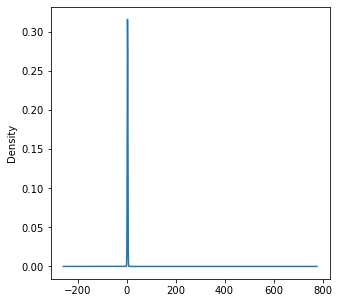

In [107]:
plt.figure(figsize = (5,5))
df['HIGH_SCHOOL_GPA'].plot(kind='density')

<AxesSubplot:>

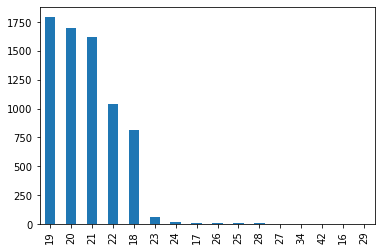

In [108]:
df['AGE'].value_counts().plot.bar()

In [109]:
#not using APPDT right now
cols = [2,4,5,6,8,10,13,14,16,21,22,23,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]

x = df_college[df_college.columns[cols]]
y = df_college[df_college.columns[30]]

print(x)
print(y)

      1st_College_Semester_GPA  SARADAP_PIDM  AGE  MILES_FROM_TTU  \
0                         2.00        163662   28            0.98   
1                         2.67        187145   26            0.98   
2                         2.45        202223   21           15.60   
3                         2.60        215582   22           79.95   
4                         1.50        221679   25            2.23   
...                        ...           ...  ...             ...   
7087                      1.29        365729   20            0.00   
7088                      0.38        369366   20            0.00   
7089                      3.08        369380   18            0.00   
7090                      2.50        370195   17            0.00   
7091                      2.86        370727   20            0.00   

      Hours_Transferred_In  HIGH_SCHOOL_GPA HOUSING  ORIENTATION_SESSION  \
0                      0.0             3.02       0                   10   
1                  

In [110]:
df_college.isin(['W']).any()


PIDMTERM                    False
TERM                        False
1st_College_Semester_GPA    False
HighSchool                  False
SARADAP_PIDM                False
AGE                         False
MILES_FROM_TTU              False
APPDT                       False
Hours_Transferred_In        False
HS_GRAD_YEAR                False
HIGH_SCHOOL_GPA             False
COLLEGE_CODE_DESC           False
MAJOR_DESC                  False
HOUSING                      True
ORIENTATION_SESSION         False
ORIENTATION_COMPLETED       False
ACT_COMPOSITE               False
Ethnicity                   False
INOUTST_Desc                False
LOAD_Desc                   False
Program_Name                False
Pell_Eligible               False
First_Gen_Status            False
Appalachian_County          False
TN_Geographic_Divisions     False
MAJOR                       False
CLASS                       False
SEGMENT                     False
COLLEGES1                   False
MAJORS1       

In [111]:
print(df_college['HOUSING'].where(df_college['HOUSING'] == 'W'))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7087    NaN
7088    NaN
7089    NaN
7090    NaN
7091    NaN
Name: HOUSING, Length: 7092, dtype: object


In [112]:
print(df_college.loc[df_college['HOUSING'].isin(['W'])])


          PIDMTERM    TERM  1st_College_Semester_GPA  \
3353  2.969460e+11  202180                      4.00   
3394  3.110220e+11  202180                      3.69   
3960  3.334120e+11  202180                      3.56   
4033  3.338920e+11  202180                      2.67   
4091  3.342250e+11  202180                      0.00   
4202  3.348270e+11  202180                      2.69   
4284  3.353240e+11  202180                      3.31   
4460  3.364360e+11  202180                      3.47   
4726  3.394800e+11  202180                      1.62   
4732  3.395300e+11  202180                      0.75   
4748  3.398750e+11  202180                      2.38   
4931  3.516160e+11  202180                      2.25   

                          HighSchool  SARADAP_PIDM  AGE  MILES_FROM_TTU  \
3353           Sunbright High School        296946   19           46.03   
3394      Dickson County High School        311022   21          106.05   
3960       Academy Of The Holy Names        33

In [113]:
df_college = df_college[df_college.HOUSING != "W"]


In [114]:
df_college.isin(['W']).any()


PIDMTERM                    False
TERM                        False
1st_College_Semester_GPA    False
HighSchool                  False
SARADAP_PIDM                False
AGE                         False
MILES_FROM_TTU              False
APPDT                       False
Hours_Transferred_In        False
HS_GRAD_YEAR                False
HIGH_SCHOOL_GPA             False
COLLEGE_CODE_DESC           False
MAJOR_DESC                  False
HOUSING                     False
ORIENTATION_SESSION         False
ORIENTATION_COMPLETED       False
ACT_COMPOSITE               False
Ethnicity                   False
INOUTST_Desc                False
LOAD_Desc                   False
Program_Name                False
Pell_Eligible               False
First_Gen_Status            False
Appalachian_County          False
TN_Geographic_Divisions     False
MAJOR                       False
CLASS                       False
SEGMENT                     False
COLLEGES1                   False
MAJORS1       

In [115]:
df_college.isin(['1-Oct-21']).any()
#1-Oct-21
#4-Nov-21
#24-Jan-22
#14-Aug-18


PIDMTERM                    False
TERM                        False
1st_College_Semester_GPA    False
HighSchool                  False
SARADAP_PIDM                False
AGE                         False
MILES_FROM_TTU              False
APPDT                        True
Hours_Transferred_In        False
HS_GRAD_YEAR                False
HIGH_SCHOOL_GPA             False
COLLEGE_CODE_DESC           False
MAJOR_DESC                  False
HOUSING                     False
ORIENTATION_SESSION         False
ORIENTATION_COMPLETED       False
ACT_COMPOSITE               False
Ethnicity                   False
INOUTST_Desc                False
LOAD_Desc                   False
Program_Name                False
Pell_Eligible               False
First_Gen_Status            False
Appalachian_County          False
TN_Geographic_Divisions     False
MAJOR                       False
CLASS                       False
SEGMENT                     False
COLLEGES1                   False
MAJORS1       

In [116]:
df_college = df_college[df_college.APPDT != "1-Oct-21"]
df_college = df_college[df_college.APPDT != "4-Nov-21"]
df_college = df_college[df_college.APPDT != "24-Jan-22"]
df_college = df_college[df_college.APPDT != "14-Aug-18"]

In [117]:
#not using APPDT right now
cols = [2,4,5,6,8,10,13,14,16,21,22,23,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]

x = df_college[df_college.columns[cols]]
y = df_college[df_college.columns[30]]

print(x)
print(y)

      1st_College_Semester_GPA  SARADAP_PIDM  AGE  MILES_FROM_TTU  \
0                         2.00        163662   28            0.98   
1                         2.67        187145   26            0.98   
2                         2.45        202223   21           15.60   
3                         2.60        215582   22           79.95   
4                         1.50        221679   25            2.23   
...                        ...           ...  ...             ...   
7087                      1.29        365729   20            0.00   
7088                      0.38        369366   20            0.00   
7089                      3.08        369380   18            0.00   
7090                      2.50        370195   17            0.00   
7091                      2.86        370727   20            0.00   

      Hours_Transferred_In  HIGH_SCHOOL_GPA HOUSING  ORIENTATION_SESSION  \
0                      0.0             3.02       0                   10   
1                  

In [118]:
standardizer = MinMaxScaler()
x_standard = standardizer.fit_transform(x)

print(x_standard)

[[0.5        0.23754955 0.46153846 ... 1.         0.         0.        ]
 [0.6675     0.32303274 0.38461538 ... 0.         0.         0.        ]
 [0.6125     0.37791991 0.19230769 ... 0.         0.         0.        ]
 ...
 [0.77       0.98640743 0.07692308 ... 0.         0.         0.        ]
 [0.625      0.98937421 0.03846154 ... 0.         1.         0.        ]
 [0.715      0.99131081 0.15384615 ... 0.         0.         0.        ]]


In [119]:
df.to_csv('cleanData4.csv',index = False)

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x_standard, y, train_size=0.6, random_state=0)

print(x_train)

[[0.8025     0.83457768 0.15384615 ... 0.         0.         0.        ]
 [0.2825     0.93362431 0.07692308 ... 0.         0.         0.        ]
 [1.         0.67488142 0.19230769 ... 0.         0.         0.        ]
 ...
 [0.9275     0.62456272 0.19230769 ... 0.         0.         0.        ]
 [0.9375     0.79839394 0.19230769 ... 0.         0.         0.        ]
 [0.875      0.80164101 0.19230769 ... 0.         0.         0.        ]]


In [121]:
knn = KNeighborsClassifier(
        n_neighbors=5,          
        weights='uniform',      
        algorithm='auto',     
        leaf_size=30,          
        p=1,                    
        metric='minkowski',    
        metric_params=None,     
        n_jobs=None             
)

knn.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [122]:
y_pred = knn.predict(x_test)


In [123]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])

print (confusion_matrix)

Actual       0     1
Predicted           
0           55    32
1          225  2519


In [124]:
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

print("True Positive: ", TP)
print("True Negative: ", TN)
print("False Positive: ", FP)
print("False Negative: ", FN)

True Positive:  2519
True Negative:  55
False Positive:  225
False Negative:  32


In [125]:
print("Confusion Matrix Metrics")
print()

Accuracy    = round(100*((TP+TN)/(TP+TN+FP+FN)),2)
Sensitivity = round(100*TP/(TP+FN),2)  
Specificity = round(100*TN/(FP+TN),2)
PPV         = round(100*TP/(TP+FP),2)  
NPV         = round(100*TN/(TN+FN),2)
FDR         = round(100*FP/(TP+FP),2)
FOR         = round(100*FN/(TN+FN),2) 

print("Accuracy:", Accuracy, "%")
print("Sensitivity:", Sensitivity, "%")
print("Specificity:", Specificity, "%")
print("Positive Predictive Value:", PPV, "%")
print("Negative Predictive Value:", NPV, "%")
print("False Discovery Rate:", FDR, "%")
print("False Omission Rate:", FOR, "%")

Confusion Matrix Metrics

Accuracy: 90.92 %
Sensitivity: 98.75 %
Specificity: 19.64 %
Positive Predictive Value: 91.8 %
Negative Predictive Value: 63.22 %
False Discovery Rate: 8.2 %
False Omission Rate: 36.78 %


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

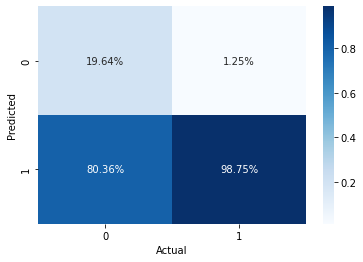

In [126]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [127]:
from sklearn.metrics import accuracy_score

In [128]:
accuracy_score (y_test,y_pred)

0.9092193571176262

In [129]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn7 = KNeighborsClassifier(n_neighbors = 7)

In [130]:
knn5.fit(x_train, y_train)
knn1.fit(x_train, y_train)
knn3.fit(x_train, y_train)
knn7.fit(x_train, y_train)

y_pred_5 = knn5.predict(x_test)
y_pred_1 = knn1.predict(x_test)
y_pred_3 = knn3.predict(x_test)
y_pred_7 = knn7.predict(x_test)


In [131]:
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)
print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)
print("Accuracy with k=7", accuracy_score(y_test, y_pred_7)*100)

Accuracy with k=5 91.0279053338043
Accuracy with k=1 89.33239138113741
Accuracy with k=3 90.95725891910985
Accuracy with k=7 90.60402684563759


In [132]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset


Best alpha using built-in LassoCV: 0.109843
Best score using built-in LassoCV: 0.163313
Lasso picked 5 variables and eliminated the other 22 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

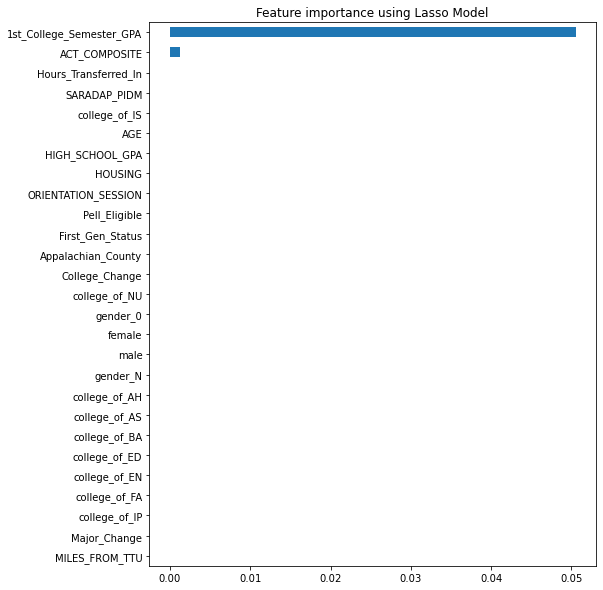

In [133]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [134]:
df.to_csv('cleanData6.csv',index = False)